### Linear Regression modeling

In [16]:
### import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sms
import numpy as np 
import seaborn as sns

In [17]:
df = pd.read_pickle('linear_data.pkl')

In [18]:
df

,categories,pages,num_reviews,num_stars,media_reviews,weight_gram,price,book_format
1016,Biography & True Stories,264,1,5,0,308,9.99,Paperback
1288,"Science Fiction, Fantasy & Horror",424,2,3,0,490,10.99,Paperback
1346,Fiction,244,1,5,0,286,9.99,Paperback
1934,"Science Fiction, Fantasy & Horror",336,3,5,0,495,8.99,Paperback
2706,Spirituality & Beliefs,320,15,5,0,334,7.99,Paperback
...,...,...,...,...,...,...,...,...
449762,"Science Fiction, Fantasy & Horror",400,2,4,0,276,6.99,Paperback
449808,Fiction,480,1,4,0,245,9.99,Paperback
450162,Spirituality & Beliefs,264,1,5,0,327,13.50,Paperback
450307,Transport: general interest,96,1,4,0,305,14.99,Paperback


### Categorical datatype to numercial

In [19]:
le = LabelEncoder()
df.categories = le.fit_transform(df.categories)
df.book_format = le. fit_transform(df.book_format)

Text(0.5, 1.0, 'Correlation Heatmap of Featrues')

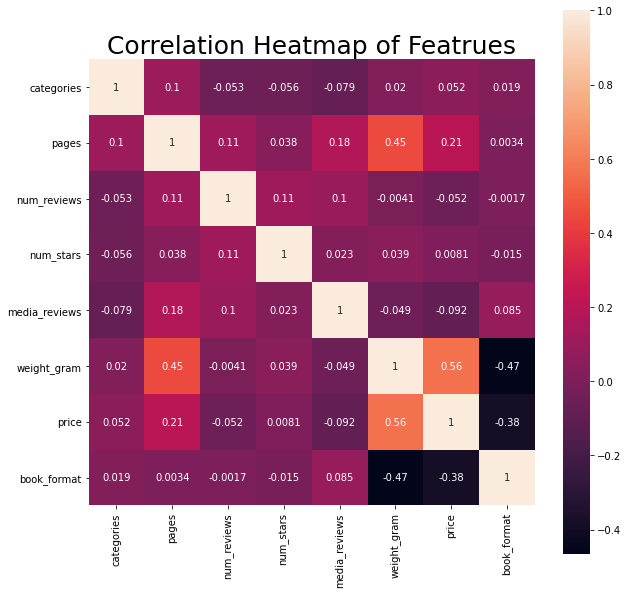

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,square=True)
plt.title('Correlation Heatmap of Featrues',size=25)

### Feature selection based on P-value

In [21]:
model = smf.ols(formula="price ~ categories + book_format + pages + num_reviews + num_stars + media_reviews", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     203.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.68e-232
Time:                        15:21:18   Log-Likelihood:                -17679.
No. Observations:                4814   AIC:                         3.537e+04
Df Residuals:                    4807   BIC:                         3.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.9164      0.879     19.238

In [22]:
df.drop(['num_stars'], axis=1, inplace=True)

### Check p-value again

In [23]:
model = smf.ols(formula="price ~  categories + book_format + pages + num_reviews + media_reviews + weight_gram", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     417.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:21:22   Log-Likelihood:                -17215.
No. Observations:                4814   AIC:                         3.444e+04
Df Residuals:                    4807   BIC:                         3.449e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.4913      0.448     21.178

In [24]:
df.drop('pages', axis=1, inplace=True)

In [25]:
model = smf.ols(formula="price ~  categories + book_format + num_reviews + media_reviews + weight_gram", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     500.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:21:27   Log-Likelihood:                -17215.
No. Observations:                4814   AIC:                         3.444e+04
Df Residuals:                    4808   BIC:                         3.448e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         9.4824      0.447     21.197

### Choose target and features

In [26]:
X = df.drop(['price'],axis=1).values  ## X are features
y = df['price'].values #### y  is the target we are going to predict
print(type(X))

<class 'numpy.ndarray'>


In [291]:
X.shape, y.shape

((4814, 5), (4814,))

### Train Test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Standardisation

In [28]:
scaler = StandardScaler()    #### data standardisation
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Fit the data to Linear regression model

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Use MSE to calculate the loss for the model

In [30]:
mse = mean_squared_error(y_pred, y_test)
print(mse)

78.5197816083471


### Plot the residuals between y_pred and y_train

c:\GIT\waterstones_linear\venv\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


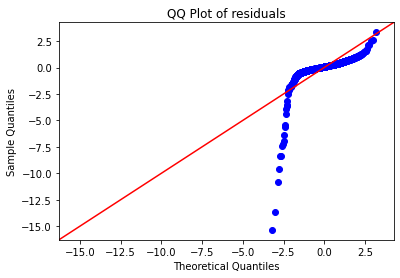

In [275]:
red = y_pred - y_test
fig = sm.qqplot(red, fit=True, line='45')
plt.title("QQ Plot of residuals")
plt.show()

In [276]:
def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

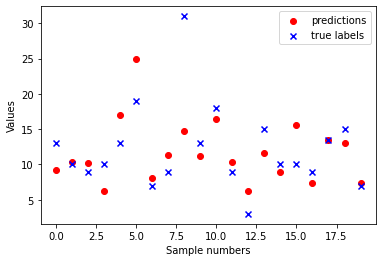

In [277]:
plot_predictions(y_pred[:20], y_test[:20])